ФИО: Хажиев Роберт Ринатович

In [1]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [2]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
from google.colab import drive
drive.mount('/content/drive/', )


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
cd "drive/MyDrive/cv_det"

/content/drive/MyDrive/TP2Sem/cv_det


# Обучение модели FasterRCNN и YOLOv5 для детекции Helmet

* Используем dataset LVIS [link](https://www.lvisdataset.org/)

* [Репозиторий YOLOv5](https://github.com/ultralytics/yolov5)

* [Конфигурационный файл](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml)

## YOLOv5 

###Обучение

Установка модели

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 14498, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 14498 (delta 35), reused 45 (delta 21), pack-reused 14430
Receiving objects: 100% (14498/14498), 13.49 MiB | 7.67 MiB/s, done.
Resolving deltas: 100% (10012/10012), done.


In [ ]:
!cd yolov5 && pip install -r requirements.txt  # install

Запуск обучения

In [ ]:
!cd yolov5 && python train.py --data lvis.yaml --cfg yolov5s.yaml --weights '' --batch-size 64

train: weights=, cfg=yolov5s.yaml, data=lvis.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-216-g6e544d5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,

In [ ]:
!ls

coco_eval.py		     helmet.jpg
coco_id_to_name.json	     model_state_dict_final.pth
coco_utils.py		     number_plates
datasets		     __pycache__
detection_examples	     README.md
detection_hw.ipynb	     test_model_state_dict_last.pth
engine.py		     test_model_state_dict_workshop_final.pth
fasterrcnn.ipynb	     transforms.py
filename_to_bbox_train.json  utils.py
filename_to_bbox_val.json    yolov5
game_detect0.jpg	     yolov5s.pt
game_detect1.jpg


###Демонстрация работы обученной модели

In [ ]:
model_path = './yolov5/runs/train/exp2/weights/best.pt'
yolo_path = './yolov5'
model = torch.hub.load(yolo_path, 'custom', path=model_path, source='local')

INFO:yolov5:YOLOv5 🚀 2022-10-29 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

YOLOv5 🚀 2022-10-29 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 


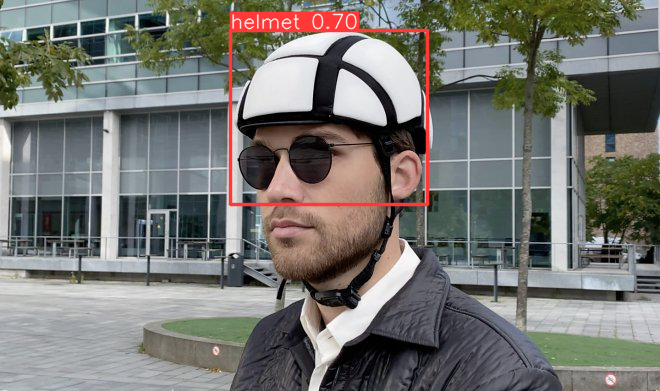

In [ ]:
img_path = 'helmet.jpg'
results = model([img_path])
results.show()

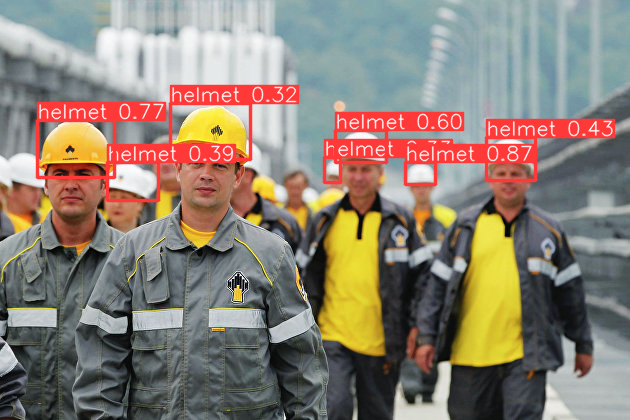

In [ ]:
img_path = 'https://1prime.ru/images/83247/95/832479518.jpg'
results = model([img_path])
results.show()

In [ ]:
train_results_df = pd.read_csv("./yolov5/runs/train/exp2/results.csv")
train_results_df.head()

epoch        train/box_loss        train/obj_loss  \
0                     0              0.121400              0.033318   
1                     1              0.113840              0.032762   
2                     2              0.109060              0.032146   
3                     3              0.099094              0.031773   
4                     4              0.090547              0.030690   

         train/cls_loss     metrics/precision  ...          val/obj_loss  \
0                     0              0.001060  ...              0.024891   
1                     0              0.001087  ...              0.025754   
2                     0              0.001168  ...              0.021634   
3                     0              0.102920  ...              0.023525   
4                     0              0.141390  ...              0.053347   

           val/cls_loss                 x/lr0                 x/lr1  \
0                     0              0.073900              0.002900   
1                     0              0.046881              0.005881   
2                     0              0.019841              0.008841   
3                     0              0.009901              0.009901   
4                     0              0.009901              0.009901   

                  x/lr2  
0              0.002900  
1              0.005881  
2              0.008841  
3              0.009901  
4              0.009901  

[5 rows x 14 columns]

In [ ]:
train_results_df.columns

Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')

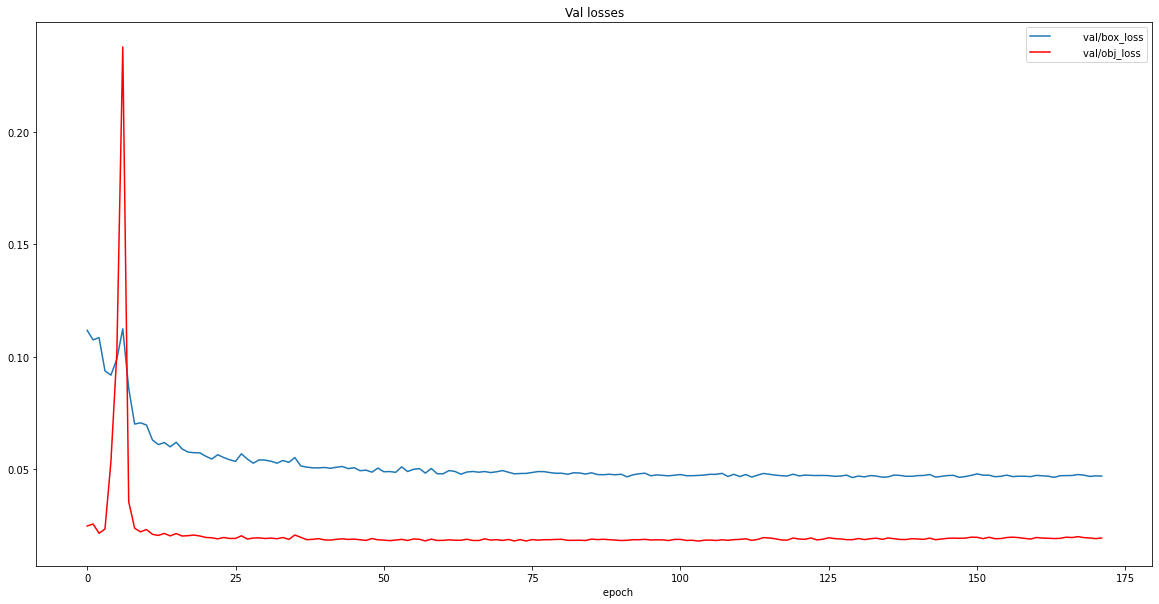

In [ ]:
ax = plt.gca()

train_results_df.plot(kind='line',x='               epoch',y='        val/box_loss', ax=ax, title="Val losses")
train_results_df.plot(kind='line',x='               epoch',y='        val/obj_loss', color='red', ax=ax, figsize=(20,10))

plt.show()

## FasterRCNN

### Установка зависимостей

In [5]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install lvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-ptopqaon
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-ptopqaon
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import lvis
from torchvision import transforms
import cv2
import seaborn as sns

### Утилиты для работы с датасетом.

In [7]:
to_tensor = transforms.ToTensor()

def val_transform(img):
    img_tensor = to_tensor(img)
    return img_tensor.unsqueeze(0)

def visualize_prediction(file, model, device='cuda', verbose=True, thresh=0.0, n_colors=None):
    img = Image.open(file)
    img_tensor = val_transform(img)
    model.to(device)
    model.eval()
    with torch.no_grad():
        predictions = model(img_tensor.to(device)) # list of size 1
    prediction = predictions[0]
    
    if n_colors is None:
        n_colors = model.roi_heads.box_predictor.cls_score.out_features
    
    palette = sns.color_palette(None, n_colors)
    
    # visualize
    img = cv2.imread(file, cv2.COLOR_BGR2RGB)
    for i in range(len(prediction['boxes'])):
        x1, x2, x3, x4 = map(int, prediction['boxes'][i].tolist())
        label = int(prediction['labels'][i].cpu())
        score = float(prediction['scores'][i].cpu())
        name = coco_id_to_name[label]
        color = palette[label]
        if verbose:
            if score > thresh:
                print ('Class: {}, Confidence: {}'.format(name, score))
        if score > thresh:
            image = cv2.rectangle(img, (x1, x2), (x3, x4), np.array(color) * 255, 2)
            cv2.putText(image, name, (x1, x2-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, np.array(color) * 255, 2)
    show_image(image)
    return prediction

def show_image(image, figsize=(16, 9), reverse=True):
    plt.figure(figsize=figsize)
    if reverse:
        plt.imshow(image[...,::-1])
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.show()
  


### Подготовка датасета

In [96]:
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image
import json
from torchvision import transforms


class DetectionDataset(torch.utils.data.Dataset):
    def __init__(self, data_dict_file, images_path, transforms=None):
        self.transforms = transforms
        self.images_path = images_path
        self.lvis_api_data = lvis.LVIS(data_dict_file)
        # with open(data_dict_file, 'r') as f:
        #     self.data_dict = json.load(f)
        
        self.imgs = self.lvis_api_data.load_imgs(list(set(self.lvis_api_data.cat_img_map[556])))
        #list(set(lvis_train_dataset.cat_img_map[556]))
        
    def __getitem__(self, idx):
        # load images ad masks
        img_path = self.images_path + self.imgs[idx]['coco_url'].rpartition('/')[-1]
        try:
            img = Image.open(img_path).convert("RGB")
        except FileNotFoundError as f:
            self.lvis_api_data.download(self.images_path, self.imgs[idx]['id'])
            img = Image.open(img_path).convert("RGB")
        w, h = img.size

        objs = []
        for i in self.lvis_api_data.img_ann_map[self.imgs[idx]['id']]:
            if i['category_id'] == 556:
                objs.append(i)

        num_objs = len(objs)
        boxes = []
        for i in objs:
            bbox = i['bbox']
            xmin = bbox[0]# * w
            ymin = bbox[1]# * w
            xdelt = bbox[2]# * h
            ydelt = bbox[3]# * h
            boxes.append([xmin, ymin, xmin+xdelt, ymin+ydelt])

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        
        # is crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img = self.transforms(img)

        return img, target
    
    def __len__(self):
        return len(self.imgs)

def visualize_from_dataset(dataset: DetectionDataset, idx):
    file = img_path = dataset.images_path + dataset.imgs[idx]['coco_url'].rpartition('/')[-1]
    img = cv2.imread(file, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    objs = []
    objs = dataset.lvis_api_data.img_ann_map[dataset.imgs[idx]['id']]
    num_objs = len(objs)
    for i in objs:
        x_min, y_min, xdelt, ydelt = tuple(i['bbox'])
        y_max = int(y_min+ydelt)
        x_max = int(x_min+xdelt)
        print(type(x_min))
        image = cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
    show_image(image)

In [97]:
img_transforms = transforms.Compose([
    transforms.ToTensor()
])


In [99]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [ ]:
train_dataset = DetectionDataset('datasets/LVIS/lvis_v1_train.json', 'datasets/LVIS/train/', img_transforms)
val_dataset = DetectionDataset('datasets/LVIS/lvis_v1_val.json', 'datasets/LVIS/val/', img_transforms)

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


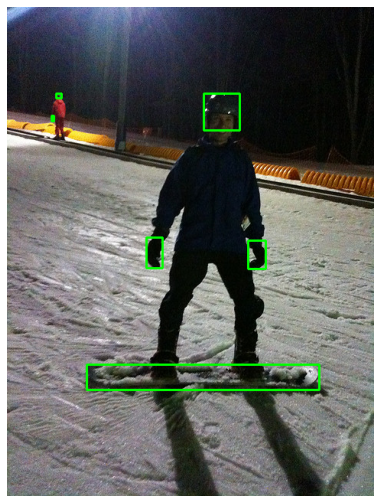

In [ ]:
visualize_from_dataset(val_dataset, 1)

In [ ]:
# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=4, shuffle=True, num_workers=4,
    collate_fn=collate_fn, drop_last=True)

data_loader_val = torch.utils.data.DataLoader(
    val_dataset, batch_size=4, shuffle=False, num_workers=1,
    collate_fn=collate_fn, drop_last=False)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


### Подготовка модели

In [9]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
# load a model pre-trained pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, pretrained_backbone=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and will be removed in 0.15, please use 'weights_backbone' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will

In [10]:
num_classes = 2
in_channels = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_channels=in_channels, num_classes=num_classes)

In [11]:
assert model.roi_heads.box_predictor.cls_score.in_features == 1024
assert model.roi_heads.box_predictor.cls_score.out_features == 2
assert model.roi_heads.box_predictor.bbox_pred.out_features == 8

### Настройка обучения

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# move model to the right device
model.to(device)

for param in model.parameters():
    param.requires_grad = False
for param in model.roi_heads.box_predictor.parameters():
    param.requires_grad = True
    
# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

In [ ]:
len(params)

4

In [ ]:
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=30,
                                               gamma=0.1)

In [ ]:
!ls

coco_eval.py		     helmet.jpg
coco_id_to_name.json	     model_state_dict_final.pth
coco_utils.py		     number_plates
datasets		     __pycache__
detection_examples	     README.md
detection_hw.ipynb	     test_model_state_dict_last.pth
engine.py		     test_model_state_dict_workshop_final.pth
fasterrcnn.ipynb	     transforms.py
filename_to_bbox_train.json  utils.py
filename_to_bbox_val.json    yolov5
game_detect0.jpg	     yolov5s.pt
game_detect1.jpg


In [21]:
from engine import evaluate

In [ ]:
import math
import sys
import time
import torch

from coco_utils import get_coco_api_from_dataset
from coco_eval import CocoEvaluator
import utils

def train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq):
    model.train()
    metric_logger = utils.MetricLogger(delimiter="  ")
    metric_logger.add_meter('lr', utils.SmoothedValue(window_size=1, fmt='{value:.6f}'))
    header = 'Epoch: [{}]'.format(epoch)

    lr_scheduler = None
    if epoch == 0:
        warmup_factor = 1. / 1000
        warmup_iters = min(1000, len(data_loader) - 1)

        lr_scheduler = utils.warmup_lr_scheduler(optimizer, warmup_iters, warmup_factor)

    for images, targets in metric_logger.log_every(data_loader, print_freq, header):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # получим предсказания сети (словарь)        
        loss_dict = model(images, targets)
        # cложим их
        losses = sum(value for value in loss_dict.values())
        loss_value = losses.item()

        if not math.isfinite(loss_value):
            print("Loss is {}, stopping training".format(loss_value))
            #print(loss_dict_reduced)
            sys.exit(1)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        if lr_scheduler is not None:
            lr_scheduler.step()

        metric_logger.update(loss=losses, **loss_dict)
        metric_logger.update(lr=optimizer.param_groups[0]["lr"])

### Запуск обучения

In [ ]:
print(device)

cuda


In [ ]:
num_epochs=50
for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=50)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_val, device=device)
    torch.save(model.state_dict(), 'helmet_fasterrcnn_model_final.pth')

Epoch: [0]  [  0/476]  eta: 1:08:52  lr: 0.000016  loss: 1.2448 (1.2448)  loss_classifier: 0.7761 (0.7761)  loss_box_reg: 0.0360 (0.0360)  loss_objectness: 0.3055 (0.3055)  loss_rpn_box_reg: 0.1271 (0.1271)  time: 8.6816  data: 1.4545  max mem: 2496
Epoch: [0]  [ 50/476]  eta: 0:05:14  lr: 0.000541  loss: 0.3109 (0.6183)  loss_classifier: 0.0772 (0.2607)  loss_box_reg: 0.0360 (0.0532)  loss_objectness: 0.1430 (0.2488)  loss_rpn_box_reg: 0.0126 (0.0556)  time: 0.5857  data: 0.0151  max mem: 2801
Epoch: [0]  [100/476]  eta: 0:04:04  lr: 0.001067  loss: 0.3251 (0.5576)  loss_classifier: 0.0607 (0.1695)  loss_box_reg: 0.0300 (0.0481)  loss_objectness: 0.2008 (0.2390)  loss_rpn_box_reg: 0.0105 (0.1011)  time: 0.5558  data: 0.0165  max mem: 3201
Epoch: [0]  [150/476]  eta: 0:03:24  lr: 0.001593  loss: 0.3400 (0.5185)  loss_classifier: 0.0513 (0.1338)  loss_box_reg: 0.0394 (0.0461)  loss_objectness: 0.1874 (0.2393)  loss_rpn_box_reg: 0.0123 (0.0993)  time: 0.5816  data: 0.0140  max mem: 3201


### Загрузим сохраненную модель

In [100]:
val_dataset = DetectionDataset('datasets/LVIS/lvis_v1_val.json', 'datasets/LVIS/val/', img_transforms)
data_loader_val = torch.utils.data.DataLoader(
    val_dataset, batch_size=4, shuffle=False, num_workers=1,
    collate_fn=collate_fn, drop_last=False)


In [87]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
# load a model pre-trained pre-trained on COCO
faster_rcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, pretrained_backbone=True)

In [88]:
num_classes = 2
in_channels = faster_rcnn.roi_heads.box_predictor.cls_score.in_features
faster_rcnn.roi_heads.box_predictor = FastRCNNPredictor(in_channels=in_channels, num_classes=num_classes)

In [89]:
assert faster_rcnn.roi_heads.box_predictor.cls_score.in_features == 1024
assert faster_rcnn.roi_heads.box_predictor.cls_score.out_features == 2
assert faster_rcnn.roi_heads.box_predictor.bbox_pred.out_features == 8

In [90]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
faster_rcnn.load_state_dict(torch.load('./helmet_fasterrcnn_model_final.pth', map_location=device))
faster_rcnn.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

### Визуализируем предсказания

In [77]:
def visualize_prediction_plate(file, model, device='cuda', verbose=True, thresh=0.0, 
                               n_colors=None, id_to_name=None):
    img = Image.open(file)
    img_tensor = val_transform(img)
    model.to(device)
    model.eval()
    with torch.no_grad():
        predictions = model(img_tensor.to(device)) # list of size 1
    prediction = predictions[0]
    
    if n_colors is None:
        n_colors = model.roi_heads.box_predictor.cls_score.out_features
    
    palette = sns.color_palette(None, n_colors)
    
    # visualize
    img = cv2.imread(file, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    image = img
    for i in range(len(prediction['boxes'])):
        x_min, y_min, x_max, y_max = map(int, prediction['boxes'][i].tolist())
        label = int(prediction['labels'][i].cpu())
        score = float(prediction['scores'][i].cpu())
        name = id_to_name[label]
        color = palette[label]
        if verbose:
            if score > thresh:
                print ('Class: {}, Confidence: {}'.format(name, score))
        if score > thresh:
            image = cv2.rectangle(img, (x_min, y_min), (x_max, y_max), np.array(color) * 255, 2)
            cv2.putText(image, name + f": {round(score,2)}", (x_min, y_min-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, np.array(color) * 255, 2)
    show_image(image)
    return prediction

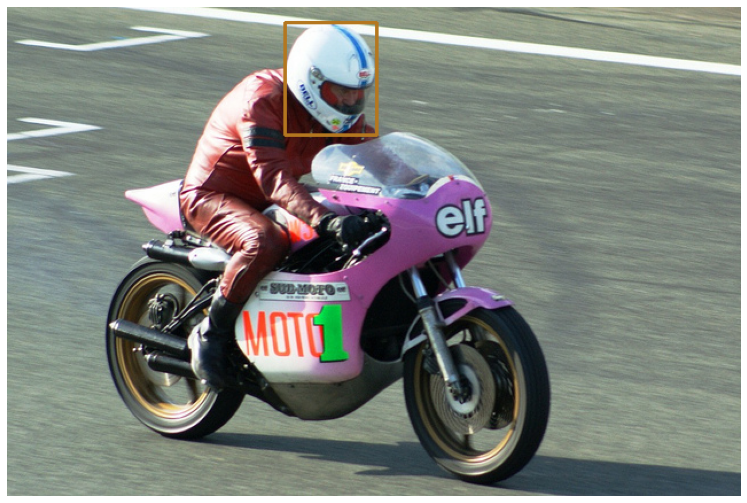

242.03996800000004 14.730005499999997 322.08995200000004 112.53999189999999


In [60]:
img = Image.open("datasets/LVIS/train/000000144795.jpg")
x_min = img.width*0.4407265-img.width*0.1250781/2
y_min = img.height*0.1490281-img.height*0.2290632/2
x_max = img.width*0.4407265+img.width*0.1250781/2
y_max = img.height*0.1490281+img.height*0.2290632/2
img = cv2.imread("datasets/LVIS/train/000000144795.jpg", cv2.COLOR_BGR2RGB)
palette = sns.color_palette(None, 1)
color = palette[0]
image = cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max),int(y_max)), np.array(color) * 255, 2)
show_image(image)
#cv2.putText(image, "name", (x_min, y_min-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, np.array(color) * 255, 2)
print(x_min, y_min, x_max, y_max)

Class: helmet, Confidence: 0.9737178087234497


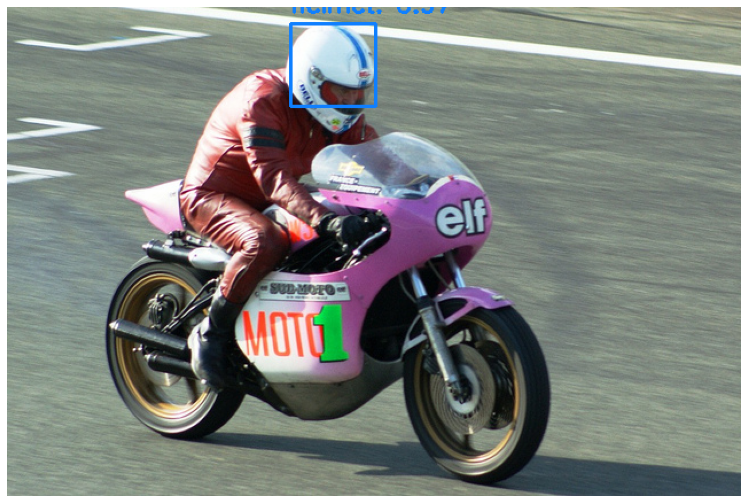

{'boxes': tensor([[247.4778,  15.8869, 321.2286,  87.2888],
         [258.3434, 103.9334, 425.0514, 228.9542],
         [277.5989, 110.0900, 410.4166, 177.8101],
         [249.8078,  12.9539, 410.7632, 167.0106],
         [166.7078,  15.0937, 321.9620, 103.0024],
         [279.6276,  18.0719, 320.1327,  62.7031],
         [218.4141,  47.3700, 321.5226,  90.4841],
         [285.2826, 177.1254, 334.3451, 214.3508],
         [102.4996, 148.3494, 157.0590, 203.1506],
         [146.9680,  38.9228, 326.6583,  73.4590],
         [263.9429, 111.6229, 348.9088, 184.0744]]),
 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'scores': tensor([0.9737, 0.4395, 0.3970, 0.1922, 0.1150, 0.1006, 0.0887, 0.0800, 0.0626,
         0.0621, 0.0579])}

In [94]:
file_name = "datasets/LVIS/train/000000144795.jpg"

id_to_name = {
    1: "helmet"
    }

visualize_prediction_plate(file_name, faster_rcnn, device=device, id_to_name=id_to_name, thresh=0.7)

Class: helmet, Confidence: 0.7772315740585327
Class: helmet, Confidence: 0.2445351779460907
Class: helmet, Confidence: 0.2347342073917389


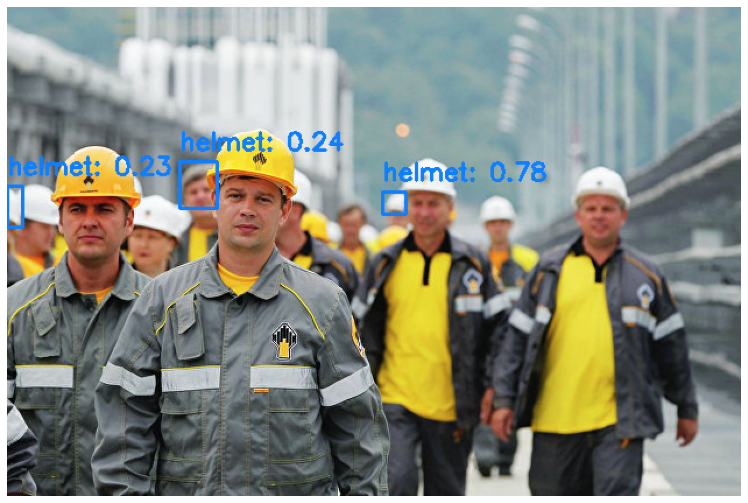

{'boxes': tensor([[322.3261, 159.1594, 342.8634, 178.4277],
         [148.4002, 133.8130, 180.3394, 173.2406],
         [  0.4982, 154.6746,  13.4539, 189.6405],
         [284.8567, 169.9120, 309.0821, 190.3836],
         [243.4478, 139.3544, 267.8451, 174.9749],
         [283.1868, 165.9687, 317.9724, 196.5323],
         [108.5542, 162.9048, 160.5045, 203.6037],
         [398.4336, 359.7342, 437.8710, 403.5103],
         [  8.3307, 152.9957,  44.2990, 206.9524],
         [167.3883, 107.3374, 259.3521, 210.8763],
         [  1.3982, 336.5450,  27.6173, 408.7422],
         [ 23.8290, 123.2416, 118.1984, 223.0552],
         [406.4571, 166.3484, 456.0377, 224.0605]]),
 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'scores': tensor([0.7772, 0.2445, 0.2347, 0.1593, 0.1509, 0.1472, 0.1440, 0.1417, 0.1172,
         0.1153, 0.1082, 0.0727, 0.0544])}

In [95]:
file_name = "helmet_test.jpg"

visualize_prediction_plate(file_name, faster_rcnn, device=device, id_to_name=id_to_name, thresh=0.2)

Class: helmet, Confidence: 0.8601592183113098
Class: helmet, Confidence: 0.28342482447624207
Class: helmet, Confidence: 0.059059951454401016


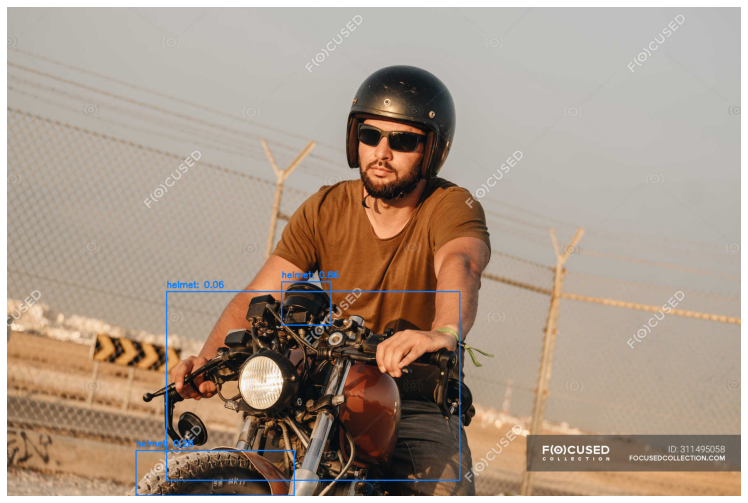

{'boxes': tensor([[ 673.1042,  675.0677,  794.5142,  781.3210],
         [ 316.5875, 1088.1156,  704.8659, 1199.5354],
         [ 391.6995,  699.4679, 1110.0176, 1161.2943]]),
 'labels': tensor([1, 1, 1]),
 'scores': tensor([0.8602, 0.2834, 0.0591])}

In [102]:
file_name = "helmet_test2.jpg"

visualize_prediction_plate(file_name, faster_rcnn, device=device, id_to_name=id_to_name)

Class: helmet, Confidence: 0.9204922914505005
Class: helmet, Confidence: 0.5551702976226807
Class: helmet, Confidence: 0.5032865405082703


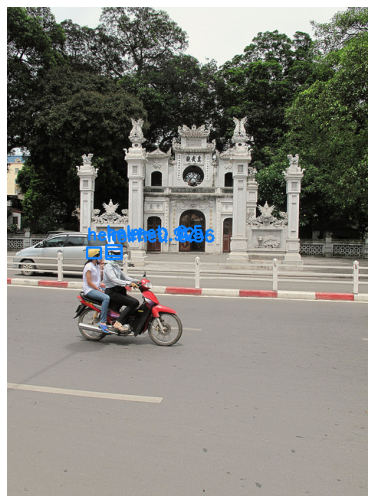

{'boxes': tensor([[104.4239, 315.4527, 122.8828, 329.1834],
         [130.4663, 317.3087, 149.0323, 326.4671],
         [129.0583, 312.4713, 149.6407, 330.3853],
         [101.8362, 313.4166, 125.2039, 339.2445],
         [130.0897, 319.4912, 147.8642, 332.5394],
         [229.2921, 210.7313, 257.5560, 235.1152],
         [132.7538, 298.4799, 159.7863, 343.1673],
         [127.0028, 308.6168, 149.1849, 344.9678],
         [117.3318, 323.3524, 127.5000, 338.8925],
         [170.7054, 354.7028, 188.0598, 372.8614]]),
 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'scores': tensor([0.9205, 0.5552, 0.5033, 0.4386, 0.2812, 0.2515, 0.1516, 0.1388, 0.0632,
         0.0507])}

In [109]:
img = np.random.choice(val_dataset.imgs)
img_filename = val_dataset.images_path + img['coco_url'].rpartition('/')[-1]
visualize_prediction_plate(img_filename, faster_rcnn, device=device, id_to_name=id_to_name, thresh=0.5)

## Сравнение моделей

### Загрузим валидационный датасет

In [110]:
val_dataset = DetectionDataset('datasets/LVIS/lvis_v1_val.json', 'datasets/LVIS/val/', img_transforms)
data_loader_val = torch.utils.data.DataLoader(
    val_dataset, batch_size=4, shuffle=False, num_workers=1,
    collate_fn=collate_fn, drop_last=False)


### Загрузим FasterRCNN

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
# load a model pre-trained pre-trained on COCO
faster_rcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, pretrained_backbone=True)

In [ ]:
num_classes = 2
in_channels = faster_rcnn.roi_heads.box_predictor.cls_score.in_features
faster_rcnn.roi_heads.box_predictor = FastRCNNPredictor(in_channels=in_channels, num_classes=num_classes)

In [ ]:
assert faster_rcnn.roi_heads.box_predictor.cls_score.in_features == 1024
assert faster_rcnn.roi_heads.box_predictor.cls_score.out_features == 2
assert faster_rcnn.roi_heads.box_predictor.bbox_pred.out_features == 8

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
faster_rcnn.load_state_dict(torch.load('./helmet_fasterrcnn_model_final.pth', map_location=device))
faster_rcnn.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

### Загрузим YOLOv5

In [111]:
model_path = './yolov5/runs/train/exp2/weights/best.pt'
yolo_path = './yolov5'
yolo = torch.hub.load(yolo_path, 'custom', path=model_path, source='local')

INFO:yolov5:requirements: YOLOv5 requirement "ipython" not found, attempting AutoUpdate...
requirements: YOLOv5 requirement "ipython" not found, attempting AutoUpdate...
INFO:yolov5:Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

INFO:yolov5:requirements: 1 package updated per /content/drive/MyDrive/TP2Sem/cv_det/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

requirements: 1 package updated per /content/drive/MyDrive/TP2Sem/cv_det/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

INFO:yolov5:YOLOv5 🚀 v6.2-216-g6e544d5 Python-3.7.15 torch-1.12.1+cu113 CPU

YOLOv5 🚀 v6.2-216-g6e544d5 Python-3.7.15 torch-1.12.1+cu113 CPU

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:YOLOv5s summary: 157 layers, 7012822 parameters, 0 gra

### Визуализация результатов

Красным отмечены предсказания YOLOv5

> 


Синим - FasterRCNN

Class: helmet, Confidence: 0.9936410784721375
Class: helmet, Confidence: 0.8374530673027039
Class: helmet, Confidence: 0.6253650784492493


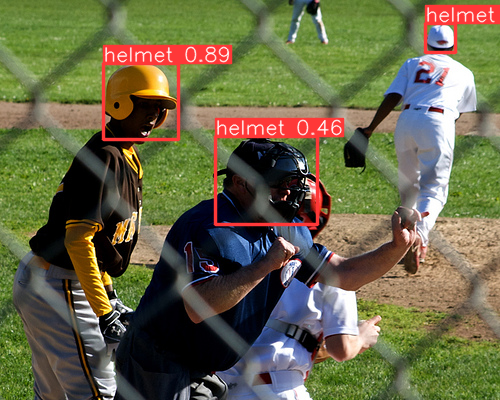

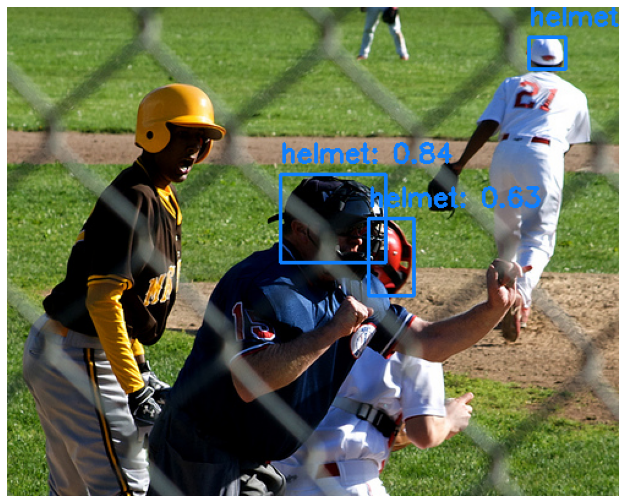

In [119]:
img = np.random.choice(val_dataset.imgs)
img_filename = val_dataset.images_path + img['coco_url'].rpartition('/')[-1]
visualize_prediction_plate(img_filename, faster_rcnn, device=device, id_to_name=id_to_name, thresh=0.5)
yolo(img_filename).show()

## Итоги

YOLOv5 показывает результаты намного лучше, чем FasterRCNN, кроме того, она работает быстрее. Возможно, это из-за количество эпох обучения.
>
Не задумался сразу о том, чтобы сохранить метрики при обучении, чтобы можно было посмотреть на графики. Немаловажную роль сыграло то, что в случае FasterRCNN я использовал финальную модель, хотя лучше было бы сохранить лучшую, как в случае с YOLOv5. Думаю, если еще поиграться с параметрами, как-то оптимизировать обучение -- можно улучшить результат FasterRCNN, однако я бы предпочел экспериментировать дальше с YOLOv5.